In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Kolikon heittoa</h2>

Seuraavassa simuloin ensiksi kolikon heittoa miljoona kertaa.
Tulokset tallennan flips-nimiseen muuttujaan.

Seuraavaksi lasken sequences-nimiseen muuttujaan, kuinka monta kertaa sama tulos tulee peräkkäin.

Tulostan kahdella eri menetelmällä eri pituisten saman tuloksen jonojen lukumäärät.

In [2]:
flips = np.random.randint(2, size = 1000000) #tuottaa sattumanvaraisesti ykkösiä ja nollia

print('Heads:', str(np.sum(flips)), 'Tails:', str(np.sum(1-flips)))

Heads: 499805 Tails: 500195


In [3]:
sequences = []
sequence = 1

for i in range(len(flips) - 1):
    if flips[i] == flips[i + 1]:
        sequence += 1
    else:
        sequences.append(sequence)
        sequence = 1
sequences.append(sequence)

In [4]:
import collections

counter=collections.Counter(sequences)
print(counter)

Counter({1: 250500, 2: 125098, 3: 62714, 4: 31422, 5: 15441, 6: 7735, 7: 3867, 8: 1957, 9: 953, 10: 480, 11: 224, 12: 116, 13: 68, 14: 35, 15: 14, 16: 12, 17: 4, 18: 2, 21: 1})


In [5]:
np.unique(sequences, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 21]),
 array([250500, 125098,  62714,  31422,  15441,   7735,   3867,   1957,
           953,    480,    224,    116,     68,     35,     14,     12,
             4,      2,      1], dtype=int64))

<h2>Kahden nopan heittoa</h2>

Seuraavassa heitän kahta noppaa tuhat kertaa.
Maskien avulla saan kätevästi selville eri silmälukujen määrät kummallekin nopalle ja parien määrät.

Tuotan otsikoidun tulostaulukon dataframea käyttäen.

Lopuksi tulostan silmälukujen summien lukumäärät pylväskaaviona.

In [6]:
rolls = np.random.randint(6, size = (1000, 2)) + 1

for i in range(1, 7):
    mask1 = rolls[:,0] == i #ensimmäinen noppa
    mask2 = rolls[:,1] == i #toinen noppa
    mask3 = mask1 & mask2 #pari (molemmilla sama tulos)
    print(i, mask1.sum(), mask2.sum(), mask3.sum())

1 166 161 23
2 182 161 35
3 147 172 22
4 142 157 21
5 177 177 35
6 186 172 43


In [7]:
results = pd.DataFrame(columns = ['Dots', 'Dice1', 'Dice2', 'Pairs'])

for i in range(1, 7):
    mask1 = rolls[:,0] == i
    mask2 = rolls[:,1] == i
    mask3 = mask1 & mask2
    results = results.append({'Dots' : i, 'Dice1' : mask1.sum(), 'Dice2' : mask2.sum(),
                              'Pairs' : mask3.sum()}, ignore_index = True)
    
print(results.to_string(index=False))

Dots Dice1 Dice2 Pairs
   1   166   161    23
   2   182   161    35
   3   147   172    22
   4   142   157    21
   5   177   177    35
   6   186   172    43


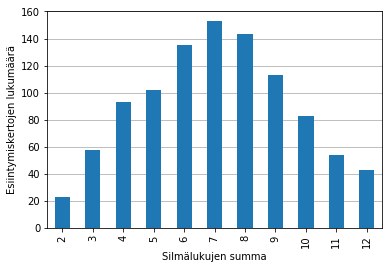

In [8]:
df = pd.DataFrame(rolls)
df['sum'] = df.sum(axis=1)

ax = df['sum'].value_counts(sort = False).plot.bar()

#Pientä tuunausta
ax.set_xlabel('Silmälukujen summa')
ax.set_ylabel('Esiintymiskertojen lukumäärä')
ax.grid(axis = 'y')
ax.set_axisbelow(True)